In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, MaxPooling1D,GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Reshape, Conv2D, GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate, Input, Flatten
import os
import json
import matplotlib.pyplot as plt

c:\users\wjdwn\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\wjdwn\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\wjdwn\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\wjdwn\anaconda3\envs\tensorflow\lib\site-packages

In [2]:
input_data = np.load('data_input.npy',allow_pickle=True)
label_data = np.load('data_label.npy',allow_pickle=True)

prepro_configs = json.load(open('data_configs.json','r'))

In [3]:
input_data.shape

(4846, 21)

In [4]:
label_data.shape

(4846,)

In [5]:
from tensorflow.keras.utils import to_categorical
label_data_encoded = to_categorical(label_data)

In [6]:
label_data

array([1, 1, 0, ..., 0, 0, 0], dtype=object)

In [7]:
#0=negative, 1=neutral, 2=positive
label_data_encoded

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [8]:
TEST_SPLIT = 0.2
RANDOM_SEED = 13371447

train_input, test_input, train_label, test_label = train_test_split(input_data, label_data_encoded, 
                                                                    test_size=TEST_SPLIT, random_state=RANDOM_SEED)

In [9]:
print('훈련 샘플 본문의 크기 : {}'.format(train_input.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(train_label.shape))
print('테스트 샘플 본문의 크기 : {}'.format(test_input.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(test_label.shape))

훈련 샘플 본문의 크기 : (3876, 21)
훈련 샘플 레이블의 크기 : (3876, 3)
테스트 샘플 본문의 크기 : (970, 21)
테스트 샘플 레이블의 크기 : (970, 3)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

In [11]:
VOCAB_SIZE = prepro_configs['vocab_size']+1

In [31]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Embedding(VOCAB_SIZE, 100))
    model.add(LSTM(150,activation='tanh'))
    model.add(Dense(3, activation='softmax'))
    
    mc = ModelCheckpoint('best_model_rnn.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    hist=model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_test, y_test),callbacks=[mc])
    
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['loss'], 'b-', label="training")
    plt.plot(hist.history['val_loss'], 'r:', label="validation")
    plt.title("loss")
    plt.subplot(1, 2, 2)
    plt.title("accuracy")
    plt.plot(hist.history['acc'], 'b-', label="training")
    plt.plot(hist.history['val_acc'], 'r:', label="validation")
    plt.legend()
    plt.tight_layout()
    plt.show()

Train on 3876 samples, validate on 970 samples
Epoch 1/100
3712/3876 [===========================>..] - ETA: 0s - loss: 0.9784 - acc: 0.5892
Epoch 00001: val_acc improved from -inf to 0.61134, saving model to best_model_rnn.h5
3876/3876 [==============================] - 3s 795us/step - loss: 0.9725 - acc: 0.5918 - val_loss: 0.8914 - val_acc: 0.6113
Epoch 2/100
3840/3876 [============================>.] - ETA: 0s - loss: 0.7976 - acc: 0.6292
Epoch 00002: val_acc improved from 0.61134 to 0.67629, saving model to best_model_rnn.h5
3876/3876 [==============================] - 1s 327us/step - loss: 0.7953 - acc: 0.6305 - val_loss: 0.7836 - val_acc: 0.6763
Epoch 3/100
3712/3876 [===========================>..] - ETA: 0s - loss: 0.5468 - acc: 0.7605
Epoch 00003: val_acc improved from 0.67629 to 0.69278, saving model to best_model_rnn.h5
3876/3876 [==============================] - 1s 324us/step - loss: 0.5448 - acc: 0.7603 - val_loss: 0.8234 - val_acc: 0.6928
Epoch 4/100
3712/3876 [=========

Epoch 61/100
3712/3876 [===========================>..] - ETA: 0s - loss: 0.0183 - acc: 0.9933
Epoch 00061: val_acc did not improve from 0.70825
3876/3876 [==============================] - 2s 405us/step - loss: 0.0181 - acc: 0.9933 - val_loss: 2.1903 - val_acc: 0.6866
Epoch 62/100
3840/3876 [============================>.] - ETA: 0s - loss: 0.0164 - acc: 0.9919
Epoch 00062: val_acc did not improve from 0.70825
3876/3876 [==============================] - 2s 410us/step - loss: 0.0165 - acc: 0.9917 - val_loss: 2.1402 - val_acc: 0.6938
Epoch 63/100
3712/3876 [===========================>..] - ETA: 0s - loss: 0.0155 - acc: 0.9922
Epoch 00063: val_acc did not improve from 0.70825
3876/3876 [==============================] - 1s 373us/step - loss: 0.0154 - acc: 0.9923 - val_loss: 2.3018 - val_acc: 0.6907
Epoch 64/100
3712/3876 [===========================>..] - ETA: 0s - loss: 0.0152 - acc: 0.9922
Epoch 00064: val_acc did not improve from 0.70825
3876/3876 [==============================] - 

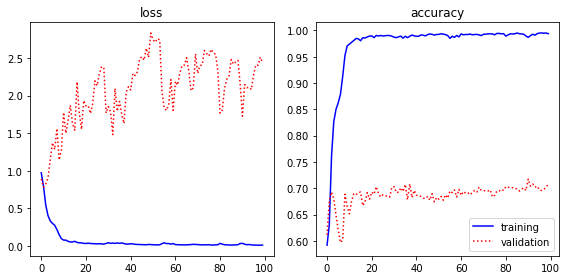

970/970 [==============================] - 1s 649us/step

 테스트 정확도: 0.7175


In [32]:
fit_and_evaluate(train_input,train_label,test_input,test_label) # 모델을 훈련하고 평가.

In [49]:
loaded_model = load_model('best_model_rnn.h5')
a=loaded_model.evaluate(test_input,test_label)
print("\n 테스트 loss: %.4f \n 테스트 정확도: %.4f" % (a[0],a[1]))

970/970 [==============================] - 1s 1ms/step

 테스트 loss: 1.7265 
 테스트 정확도: 0.7175


In [14]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Embedding(VOCAB_SIZE, 100))
    model.add(Dropout(0.3))
    model.add(Conv1D(128,3, padding= 'valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=4))
    model.add(LSTM(56,activation='tanh'))
    model.add(Dense(3,activation='softmax'))
    
    mc = ModelCheckpoint('best_model_cnn_rnn.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    hist=model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_test, y_test),callbacks=[mc])
    
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['loss'], 'b-', label="training")
    plt.plot(hist.history['val_loss'], 'r:', label="validation")
    plt.title("loss")
    plt.subplot(1, 2, 2)
    plt.title("accuracy")
    plt.plot(hist.history['acc'], 'b-', label="training")
    plt.plot(hist.history['val_acc'], 'r:', label="validation")
    plt.legend()
    plt.tight_layout()
    plt.show()

Train on 3876 samples, validate on 970 samples
Epoch 1/100
3712/3876 [===========================>..] - ETA: 0s - loss: 0.9579 - acc: 0.5905
Epoch 00001: val_acc improved from -inf to 0.60825, saving model to best_model_cnn_rnn.h5
3876/3876 [==============================] - 3s 836us/step - loss: 0.9561 - acc: 0.5908 - val_loss: 0.8994 - val_acc: 0.6082
Epoch 2/100
3840/3876 [============================>.] - ETA: 0s - loss: 0.8324 - acc: 0.6219
Epoch 00002: val_acc improved from 0.60825 to 0.67423, saving model to best_model_cnn_rnn.h5
3876/3876 [==============================] - 0s 126us/step - loss: 0.8305 - acc: 0.6231 - val_loss: 0.7621 - val_acc: 0.6742
Epoch 3/100
3840/3876 [============================>.] - ETA: 0s - loss: 0.5918 - acc: 0.7323
Epoch 00003: val_acc improved from 0.67423 to 0.68041, saving model to best_model_cnn_rnn.h5
3876/3876 [==============================] - 0s 127us/step - loss: 0.5929 - acc: 0.7317 - val_loss: 0.7463 - val_acc: 0.6804
Epoch 4/100
3584/387

Epoch 31/100
3584/3876 [==========================>...] - ETA: 0s - loss: 0.0163 - acc: 0.9944
Epoch 00031: val_acc did not improve from 0.71959
3876/3876 [==============================] - 0s 120us/step - loss: 0.0163 - acc: 0.9943 - val_loss: 1.8126 - val_acc: 0.7041
Epoch 32/100
3840/3876 [============================>.] - ETA: 0s - loss: 0.0188 - acc: 0.9945
Epoch 00032: val_acc did not improve from 0.71959
3876/3876 [==============================] - 0s 112us/step - loss: 0.0186 - acc: 0.9946 - val_loss: 1.9022 - val_acc: 0.7010
Epoch 33/100
3840/3876 [============================>.] - ETA: 0s - loss: 0.0148 - acc: 0.9958
Epoch 00033: val_acc did not improve from 0.71959
3876/3876 [==============================] - 0s 112us/step - loss: 0.0154 - acc: 0.9956 - val_loss: 1.9092 - val_acc: 0.7031
Epoch 34/100
3584/3876 [==========================>...] - ETA: 0s - loss: 0.0190 - acc: 0.9925
Epoch 00034: val_acc did not improve from 0.71959
3876/3876 [==============================] - 

Epoch 61/100
3584/3876 [==========================>...] - ETA: 0s - loss: 0.0106 - acc: 0.9958
Epoch 00061: val_acc did not improve from 0.71959
3876/3876 [==============================] - 0s 129us/step - loss: 0.0113 - acc: 0.9959 - val_loss: 1.8009 - val_acc: 0.7031
Epoch 62/100
3840/3876 [============================>.] - ETA: 0s - loss: 0.0095 - acc: 0.9961
Epoch 00062: val_acc did not improve from 0.71959
3876/3876 [==============================] - 0s 115us/step - loss: 0.0094 - acc: 0.9961 - val_loss: 1.8389 - val_acc: 0.6959
Epoch 63/100
3712/3876 [===========================>..] - ETA: 0s - loss: 0.0099 - acc: 0.9962
Epoch 00063: val_acc did not improve from 0.71959
3876/3876 [==============================] - 0s 113us/step - loss: 0.0096 - acc: 0.9964 - val_loss: 1.8927 - val_acc: 0.6959
Epoch 64/100
3840/3876 [============================>.] - ETA: 0s - loss: 0.0118 - acc: 0.9951
Epoch 00064: val_acc did not improve from 0.71959
3876/3876 [==============================] - 

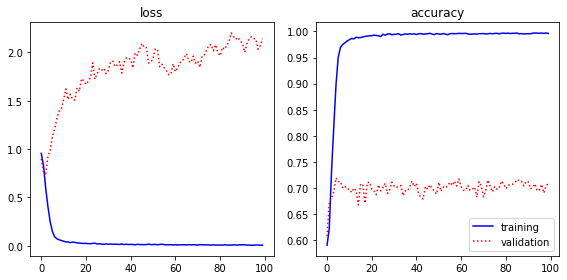

970/970 [==============================] - 0s 444us/step

 테스트 정확도: 0.7196


In [15]:
fit_and_evaluate(train_input,train_label,test_input,test_label) # 모델을 훈련하고 평가.
loaded_model = load_model('best_model_cnn_rnn.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(test_input,test_label)[1]))

In [50]:
loaded_model = load_model('best_model_cnn_rnn.h5')
a=loaded_model.evaluate(test_input,test_label)
print("\n 테스트 loss: %.4f \n 테스트 정확도: %.4f" % (a[0],a[1]))

970/970 [==============================] - 1s 1ms/step

 테스트 loss: 0.9917 
 테스트 정확도: 0.7196


In [16]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Embedding(VOCAB_SIZE, 100))
    model.add(Dropout(0.3))
    model.add(Conv1D(256,3, padding= 'valid', activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    
    mc = ModelCheckpoint('best_model_cnn.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    hist=model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_test, y_test),callbacks=[mc])
    
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['loss'], 'b-', label="training")
    plt.plot(hist.history['val_loss'], 'r:', label="validation")
    plt.title("loss")
    plt.subplot(1, 2, 2)
    plt.title("accuracy")
    plt.plot(hist.history['acc'], 'b-', label="training")
    plt.plot(hist.history['val_acc'], 'r:', label="validation")
    plt.legend()
    plt.tight_layout()
    plt.show()

Train on 3876 samples, validate on 970 samples
Epoch 1/100
3840/3876 [============================>.] - ETA: 0s - loss: 0.9704 - acc: 0.5742
Epoch 00001: val_acc improved from -inf to 0.61031, saving model to best_model_rnn.h5
3876/3876 [==============================] - 6s 2ms/step - loss: 0.9693 - acc: 0.5748 - val_loss: 0.8814 - val_acc: 0.6103
Epoch 2/100
3840/3876 [============================>.] - ETA: 0s - loss: 0.7777 - acc: 0.6310
Epoch 00002: val_acc improved from 0.61031 to 0.67526, saving model to best_model_rnn.h5
3876/3876 [==============================] - 1s 349us/step - loss: 0.7750 - acc: 0.6331 - val_loss: 0.7702 - val_acc: 0.6753
Epoch 3/100
3840/3876 [============================>.] - ETA: 0s - loss: 0.5400 - acc: 0.7664
Epoch 00003: val_acc did not improve from 0.67526
3876/3876 [==============================] - 1s 332us/step - loss: 0.5395 - acc: 0.7668 - val_loss: 0.8072 - val_acc: 0.6526
Epoch 4/100
3712/3876 [===========================>..] - ETA: 0s - loss: 

Epoch 31/100
3712/3876 [===========================>..] - ETA: 0s - loss: 0.0243 - acc: 0.9925
Epoch 00031: val_acc did not improve from 0.71753
3876/3876 [==============================] - 1s 315us/step - loss: 0.0252 - acc: 0.9925 - val_loss: 2.2278 - val_acc: 0.7000
Epoch 32/100
3712/3876 [===========================>..] - ETA: 0s - loss: 0.0286 - acc: 0.9911
Epoch 00032: val_acc did not improve from 0.71753
3876/3876 [==============================] - 1s 317us/step - loss: 0.0301 - acc: 0.9905 - val_loss: 1.7179 - val_acc: 0.6722
Epoch 33/100
3712/3876 [===========================>..] - ETA: 0s - loss: 0.0282 - acc: 0.9914
Epoch 00033: val_acc did not improve from 0.71753
3876/3876 [==============================] - 1s 326us/step - loss: 0.0295 - acc: 0.9910 - val_loss: 1.9801 - val_acc: 0.7021
Epoch 34/100
3712/3876 [===========================>..] - ETA: 0s - loss: 0.0322 - acc: 0.9890
Epoch 00034: val_acc did not improve from 0.71753
3876/3876 [==============================] - 

3712/3876 [===========================>..] - ETA: 0s - loss: 0.0178 - acc: 0.9930
Epoch 00091: val_acc did not improve from 0.71753
3876/3876 [==============================] - 1s 345us/step - loss: 0.0176 - acc: 0.9930 - val_loss: 2.3099 - val_acc: 0.6948
Epoch 92/100
3712/3876 [===========================>..] - ETA: 0s - loss: 0.0156 - acc: 0.9943
Epoch 00092: val_acc did not improve from 0.71753
3876/3876 [==============================] - 1s 328us/step - loss: 0.0186 - acc: 0.9938 - val_loss: 2.2682 - val_acc: 0.6907
Epoch 93/100
3840/3876 [============================>.] - ETA: 0s - loss: 0.0261 - acc: 0.9904
Epoch 00093: val_acc did not improve from 0.71753
3876/3876 [==============================] - 1s 350us/step - loss: 0.0261 - acc: 0.9905 - val_loss: 2.2894 - val_acc: 0.6948
Epoch 94/100
3712/3876 [===========================>..] - ETA: 0s - loss: 0.0203 - acc: 0.9919
Epoch 00094: val_acc did not improve from 0.71753
3876/3876 [==============================] - 1s 335us/step

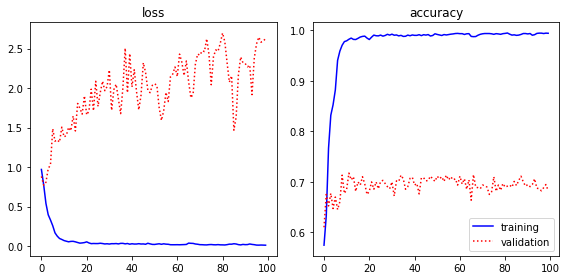

In [52]:
fit_and_evaluate(train_input,train_label,test_input,test_label) # 모델을 훈련하고 평가.

In [56]:
loaded_model = load_model('best_model_cnn.h5')
a=loaded_model.evaluate(test_input,test_label)
print("\n 테스트 loss: %.4f \n 테스트 정확도: %.4f" % (a[0],a[1]))

970/970 [==============================] - 1s 1ms/step

 테스트 loss: 1.2098 
 테스트 정확도: 0.7402


In [12]:
num_features = VOCAB_SIZE
sequence_length = 21
embedding_dimension = 100

In [13]:
def imdb_cnn_2():
    model = Sequential()

    model.add(Embedding(input_dim = num_features, output_dim = embedding_dimension,input_length = sequence_length))
    model.add(Reshape((sequence_length, embedding_dimension, 1), input_shape = (sequence_length, embedding_dimension)))
    model.add(Conv2D(filters = 128, kernel_size = (5, embedding_dimension), strides = (1,1), padding = 'valid'))
    model.add(GlobalMaxPooling2D())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3))
    model.add(Activation('softmax'))
   
    model.compile(loss='categorical_crossentropy', optimizer='adam' , metrics=['accuracy'])

    return model

model = imdb_cnn_2()

Train on 3876 samples, validate on 970 samples
Epoch 1/100
3200/3876 [=======================>......] - ETA: 0s - loss: 0.9829 - acc: 0.5700
Epoch 00001: val_acc improved from -inf to 0.63711, saving model to best_model_cnn2.h5
3876/3876 [==============================] - 2s 552us/step - loss: 0.9698 - acc: 0.5769 - val_loss: 0.8714 - val_acc: 0.6371
Epoch 2/100
3072/3876 [======================>.......] - ETA: 0s - loss: 0.8173 - acc: 0.6475
Epoch 00002: val_acc improved from 0.63711 to 0.69278, saving model to best_model_cnn2.h5
3876/3876 [==============================] - 0s 67us/step - loss: 0.7885 - acc: 0.6600 - val_loss: 0.7009 - val_acc: 0.6928
Epoch 3/100
3200/3876 [=======================>......] - ETA: 0s - loss: 0.5158 - acc: 0.7903
Epoch 00003: val_acc improved from 0.69278 to 0.72887, saving model to best_model_cnn2.h5
3876/3876 [==============================] - 0s 66us/step - loss: 0.5005 - acc: 0.7972 - val_loss: 0.6580 - val_acc: 0.7289
Epoch 4/100
2944/3876 [========

Epoch 61/100
3456/3876 [=========================>....] - ETA: 0s - loss: 0.0055 - acc: 0.9970   - ETA: 0s - loss: 0.0054 - acc: 0.9971
Epoch 00061: val_acc did not improve from 0.75155
3876/3876 [==============================] - 0s 61us/step - loss: 0.0051 - acc: 0.9972 - val_loss: 2.0361 - val_acc: 0.7268
Epoch 62/100
3200/3876 [=======================>......] - ETA: 0s - loss: 0.0062 - acc: 0.9966
Epoch 00062: val_acc did not improve from 0.75155
3876/3876 [==============================] - 0s 59us/step - loss: 0.0054 - acc: 0.9972 - val_loss: 2.0556 - val_acc: 0.7299
Epoch 63/100
3200/3876 [=======================>......] - ETA: 0s - loss: 0.0051 - acc: 0.9978
Epoch 00063: val_acc did not improve from 0.75155
3876/3876 [==============================] - 0s 57us/step - loss: 0.0055 - acc: 0.9972 - val_loss: 2.0736 - val_acc: 0.7299
Epoch 64/100
3456/3876 [=========================>....] - ETA: 0s - loss: 0.0077 - acc: 0.9968  
Epoch 00064: val_acc did not improve from 0.75155
3876/

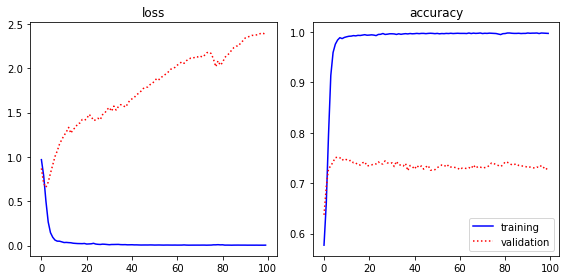

970/970 [==============================] - 0s 405us/step

 테스트 정확도: 0.7515


In [20]:
mc = ModelCheckpoint('best_model_cnn2.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)
hist= model.fit(train_input,train_label, batch_size = 128, epochs = 100, validation_data=(test_input,test_label),callbacks=[mc])

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'b-', label="training")
plt.plot(hist.history['val_loss'], 'r:', label="validation")
plt.title("loss")
plt.subplot(1, 2, 2)
plt.title("accuracy")
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="validation")
plt.legend()
plt.tight_layout()
plt.show()

loaded_model = load_model('best_model_cnn2.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(test_input,test_label)[1]))

In [54]:
loaded_model = load_model('best_model_cnn2.h5')
a=loaded_model.evaluate(test_input,test_label)
print("\n 테스트 loss: %.4f \n 테스트 정확도: %.4f" % (a[0],a[1]))

970/970 [==============================] - 1s 1ms/step

 테스트 loss: 1.0050 
 테스트 정확도: 0.7515


In [20]:
filter_sizes = [3, 4, 5]

def convolution():
    inn = Input(shape = (sequence_length, embedding_dimension, 1))
    convolutions = []
    # we conduct three convolutions & poolings then concatenate them.
    for fs in filter_sizes:
        conv = Conv2D(filters = 128, kernel_size = (fs, embedding_dimension), strides = 1, padding = "valid")(inn)
        maxpool = GlobalMaxPooling2D()(conv)
        convolutions.append(maxpool)

    outt = concatenate(convolutions)
    model = Model(inputs = inn, outputs = outt)

    return model

def imdb_cnn_3():

    model = Sequential()
    model.add(Embedding(input_dim = VOCAB_SIZE, output_dim = embedding_dimension, input_length = sequence_length))
    model.add(Reshape((sequence_length, embedding_dimension, 1), input_shape = (sequence_length, embedding_dimension)))

    # call convolution method defined above
    model.add(convolution())

    model.add(Flatten())
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(3))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam' , metrics=['accuracy'])

    return model

model = imdb_cnn_3()

Train on 3876 samples, validate on 970 samples
Epoch 1/100
3200/3876 [=======================>......] - ETA: 0s - loss: 0.9578 - acc: 0.5981
Epoch 00001: val_acc improved from -inf to 0.64948, saving model to best_model_cnn3.h5
3876/3876 [==============================] - 2s 541us/step - loss: 0.9490 - acc: 0.5967 - val_loss: 0.8389 - val_acc: 0.6495
Epoch 2/100
3712/3876 [===========================>..] - ETA: 0s - loss: 0.7414 - acc: 0.6727
Epoch 00002: val_acc improved from 0.64948 to 0.70412, saving model to best_model_cnn3.h5
3876/3876 [==============================] - 0s 94us/step - loss: 0.7397 - acc: 0.6741 - val_loss: 0.7089 - val_acc: 0.7041
Epoch 3/100
3840/3876 [============================>.] - ETA: 0s - loss: 0.4573 - acc: 0.8091
Epoch 00003: val_acc improved from 0.70412 to 0.74021, saving model to best_model_cnn3.h5
3876/3876 [==============================] - 0s 90us/step - loss: 0.4574 - acc: 0.8088 - val_loss: 0.7303 - val_acc: 0.7402
Epoch 4/100
3584/3876 [========

Epoch 61/100
3840/3876 [============================>.] - ETA: 0s - loss: 0.0050 - acc: 0.9974
Epoch 00061: val_acc did not improve from 0.75773
3876/3876 [==============================] - 0s 78us/step - loss: 0.0049 - acc: 0.9974 - val_loss: 2.0663 - val_acc: 0.7402
Epoch 62/100
3200/3876 [=======================>......] - ETA: 0s - loss: 0.0044 - acc: 0.9975
Epoch 00062: val_acc did not improve from 0.75773
3876/3876 [==============================] - 0s 78us/step - loss: 0.0054 - acc: 0.9972 - val_loss: 2.0960 - val_acc: 0.7361
Epoch 63/100
3200/3876 [=======================>......] - ETA: 0s - loss: 0.0061 - acc: 0.9969
Epoch 00063: val_acc did not improve from 0.75773
3876/3876 [==============================] - 0s 76us/step - loss: 0.0091 - acc: 0.9954 - val_loss: 2.0089 - val_acc: 0.7351
Epoch 64/100
3712/3876 [===========================>..] - ETA: 0s - loss: 0.0109 - acc: 0.9957
Epoch 00064: val_acc did not improve from 0.75773
3876/3876 [==============================] - 0s 

Epoch 92/100
3200/3876 [=======================>......] - ETA: 0s - loss: 0.0050 - acc: 0.9975 
Epoch 00092: val_acc did not improve from 0.75773
3876/3876 [==============================] - 0s 76us/step - loss: 0.0044 - acc: 0.9979 - val_loss: 2.3588 - val_acc: 0.7381
Epoch 93/100
3200/3876 [=======================>......] - ETA: 0s - loss: 0.0034 - acc: 0.9984- ETA: 0s - loss: 0.0041 - acc: 0.997
Epoch 00093: val_acc did not improve from 0.75773
3876/3876 [==============================] - 0s 77us/step - loss: 0.0044 - acc: 0.9974 - val_loss: 2.3580 - val_acc: 0.7371
Epoch 94/100
3840/3876 [============================>.] - ETA: 0s - loss: 0.0043 - acc: 0.9969
Epoch 00094: val_acc did not improve from 0.75773
3876/3876 [==============================] - 0s 77us/step - loss: 0.0045 - acc: 0.9966 - val_loss: 2.3619 - val_acc: 0.7351
Epoch 95/100
3200/3876 [=======================>......] - ETA: 0s - loss: 0.0042 - acc: 0.9972- ETA: 0s - loss: 0.0056 - acc: 0.9
Epoch 00095: val_acc did 

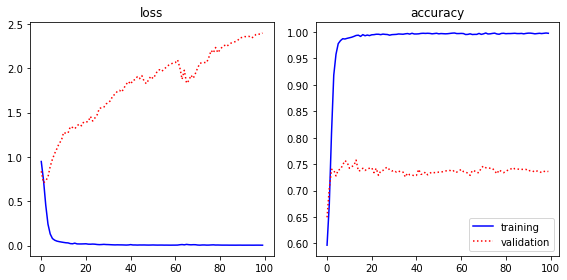

970/970 [==============================] - 0s 453us/step

 테스트 loss: 1.3422 
 테스트 정확도: 0.7577


In [21]:
mc = ModelCheckpoint('best_model_cnn3.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)
hist= model.fit(train_input,train_label, batch_size = 128, epochs = 100, validation_data=(test_input,test_label),callbacks=[mc])

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'b-', label="training")
plt.plot(hist.history['val_loss'], 'r:', label="validation")
plt.title("loss")
plt.subplot(1, 2, 2)
plt.title("accuracy")
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="validation")
plt.legend()
plt.tight_layout()
plt.show()

loaded_model = load_model('best_model_cnn3.h5')
a=loaded_model.evaluate(test_input,test_label)
print("\n 테스트 loss: %.4f \n 테스트 정확도: %.4f" % (a[0],a[1]))

In [22]:
filter_sizes = [3, 4, 5]

def convolution():
    inn = Input(shape = (sequence_length, embedding_dimension))
    convolutions = []
    # we conduct three convolutions & poolings then concatenate them.
    for fs in filter_sizes:
        conv = Conv1D(filters = 128, kernel_size = fs, activation=tf.nn.relu , padding = "valid")(inn)
        maxpool = GlobalMaxPooling1D()(conv)
        convolutions.append(maxpool)

    outt = concatenate(convolutions)
    model = Model(inputs = inn, outputs = outt)

    return model

def imdb_cnn_4():

    model = Sequential()
    model.add(Embedding(input_dim = VOCAB_SIZE, output_dim = embedding_dimension, input_length = sequence_length))
    # call convolution method defined above
    model.add(convolution())

    model.add(Flatten())
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam' , metrics=['accuracy'])

    return model

model = imdb_cnn_4()

Train on 3876 samples, validate on 970 samples
Epoch 1/100
3584/3876 [==========================>...] - ETA: 0s - loss: 0.9616 - acc: 0.5840
Epoch 00001: val_acc improved from -inf to 0.62165, saving model to best_model_cnn4.h5
3876/3876 [==============================] - 3s 654us/step - loss: 0.9594 - acc: 0.5833 - val_loss: 0.8832 - val_acc: 0.6216
Epoch 2/100
3840/3876 [============================>.] - ETA: 0s - loss: 0.8290 - acc: 0.6245
Epoch 00002: val_acc improved from 0.62165 to 0.67113, saving model to best_model_cnn4.h5
3876/3876 [==============================] - 0s 91us/step - loss: 0.8279 - acc: 0.6251 - val_loss: 0.7792 - val_acc: 0.6711
Epoch 3/100
3840/3876 [============================>.] - ETA: 0s - loss: 0.6156 - acc: 0.7378
Epoch 00003: val_acc improved from 0.67113 to 0.70722, saving model to best_model_cnn4.h5
3876/3876 [==============================] - 0s 91us/step - loss: 0.6144 - acc: 0.7386 - val_loss: 0.7105 - val_acc: 0.7072
Epoch 4/100
3200/3876 [========

Epoch 00060: val_acc did not improve from 0.74330
3876/3876 [==============================] - 0s 80us/step - loss: 0.0147 - acc: 0.9948 - val_loss: 2.3440 - val_acc: 0.7309
Epoch 61/100
3200/3876 [=======================>......] - ETA: 0s - loss: 0.0137 - acc: 0.9947
Epoch 00061: val_acc did not improve from 0.74330
3876/3876 [==============================] - 0s 78us/step - loss: 0.0165 - acc: 0.9946 - val_loss: 2.2053 - val_acc: 0.7165
Epoch 62/100
3840/3876 [============================>.] - ETA: 0s - loss: 0.0129 - acc: 0.9951
Epoch 00062: val_acc did not improve from 0.74330
3876/3876 [==============================] - 0s 82us/step - loss: 0.0128 - acc: 0.9951 - val_loss: 2.1690 - val_acc: 0.7134
Epoch 63/100
3840/3876 [============================>.] - ETA: 0s - loss: 0.0084 - acc: 0.9966
Epoch 00063: val_acc did not improve from 0.74330
3876/3876 [==============================] - 0s 82us/step - loss: 0.0083 - acc: 0.9966 - val_loss: 2.3062 - val_acc: 0.7278
Epoch 64/100
3200/3

Epoch 91/100
3200/3876 [=======================>......] - ETA: 0s - loss: 0.0078 - acc: 0.9966
Epoch 00091: val_acc did not improve from 0.74330
3876/3876 [==============================] - 0s 77us/step - loss: 0.0091 - acc: 0.9961 - val_loss: 2.5990 - val_acc: 0.7165
Epoch 92/100
3200/3876 [=======================>......] - ETA: 0s - loss: 0.0083 - acc: 0.9969
Epoch 00092: val_acc did not improve from 0.74330
3876/3876 [==============================] - 0s 77us/step - loss: 0.0089 - acc: 0.9964 - val_loss: 2.6287 - val_acc: 0.7113
Epoch 93/100
3200/3876 [=======================>......] - ETA: 0s - loss: 0.0089 - acc: 0.9959
Epoch 00093: val_acc did not improve from 0.74330
3876/3876 [==============================] - 0s 77us/step - loss: 0.0082 - acc: 0.9961 - val_loss: 2.6770 - val_acc: 0.7124
Epoch 94/100
3200/3876 [=======================>......] - ETA: 0s - loss: 0.0073 - acc: 0.9966 
Epoch 00094: val_acc did not improve from 0.74330
3876/3876 [==============================] - 0s

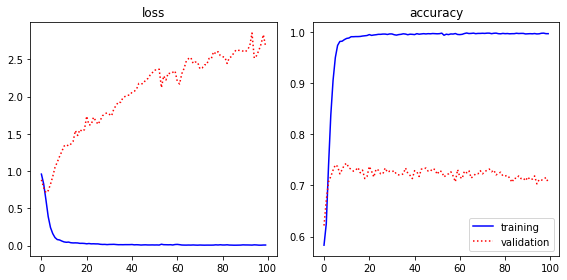

970/970 [==============================] - 1s 648us/step

 테스트 loss: 1.3348 
 테스트 정확도: 0.7433


In [23]:
mc = ModelCheckpoint('best_model_cnn4.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)
hist= model.fit(train_input,train_label, batch_size = 128, epochs = 100, validation_data=(test_input,test_label),callbacks=[mc])

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'b-', label="training")
plt.plot(hist.history['val_loss'], 'r:', label="validation")
plt.title("loss")
plt.subplot(1, 2, 2)
plt.title("accuracy")
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="validation")
plt.legend()
plt.tight_layout()
plt.show()

loaded_model = load_model('best_model_cnn4.h5')
a=loaded_model.evaluate(test_input,test_label)
print("\n 테스트 loss: %.4f \n 테스트 정확도: %.4f" % (a[0],a[1]))